## Systematic approach to Exploring a given data set 
I have used the popular titanic dataset to go through a series of sequential questions that you need to answer when exploring a new dataset 
1) How many rows and columns are there in the dataset?
2) Appropriate summaries of columns 
    1) Summary statistics of numerical values
    2) Frequency distribution of categorical values
    3) Find out the missing values and replace with the mean 
3) Univariate visualizations to know the distrbutions 
    1) Histograms and box plots for numeric columns
    2) Bar charts for categorical data
4) Bivariate analysis
    1) Correlation between 2 numeric variables
    2) Scatter plot between 2 numeric variables
5) Convert categorical into dummy variable taking value 1 and 0 
6) Converting numeric variables into categorical data types
    1) Using an advanced function which maps values into bins of desired ranges 
    
    

In [1]:
# Import pandas and numpy libraries
import pandas as pd
import numpy as np

In [2]:
# Read dataset from a URL (online), and store into a DataFrame
titanic = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/carData/TitanicSurvival.csv')

In [3]:
# Show information about the dataset, including variable details
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rownames        1309 non-null   object 
 1   survived        1309 non-null   object 
 2   sex             1309 non-null   object 
 3   age             1046 non-null   float64
 4   passengerClass  1309 non-null   object 
dtypes: float64(1), object(4)
memory usage: 51.3+ KB


In [4]:
# Show a summary of the first 5 rows of the dataset
titanic.head()

,rownames,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st


## First task for you is to get a comprehensive output of all the steps from 1 to 2 mentioned above for variables in the titanic dataset 
Which function did you use for each of the tasks ?

## Lets focus on missing values now 

In [5]:
# How many non-missing values in each column?
titanic.count()

rownames          1309
survived          1309
sex               1309
age               1046
passengerClass    1309
dtype: int64

In [6]:
# How many missing values in each column? 
titanic.isnull().sum()

rownames            0
survived            0
sex                 0
age               263
passengerClass      0
dtype: int64

In [7]:
# Replace the missing with mean of age for non missing values,
# then show how many non-missing values in the 'age' variable
titanic['age'].fillna(titanic['age'].mean).count()

1309

In [8]:
# List all the possible unique values in the 'passengerClass' variable
titanic['passengerClass'].unique()

array(['1st', '2nd', '3rd'], dtype=object)

In [9]:
# How many possible unique values in the 'passengerClass' variable?
titanic['passengerClass'].nunique()

3

In [10]:
# For each possible unique value in the 'passengerClass' variable,
# count how often that value occurs
titanic['passengerClass'].value_counts()

passengerClass
3rd    709
1st    323
2nd    277
Name: count, dtype: int64

## Secondly lets explore some  visualization functions using a special library called seaborn to work on steps 3 to 4 

In [11]:
# Import some libraries that allow us to perform visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\jasonchan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

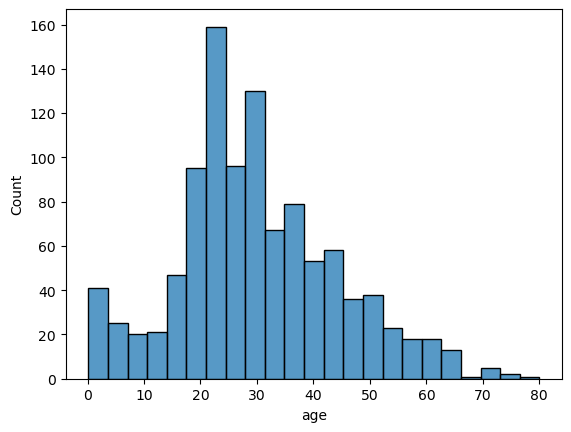

In [12]:
# Show historgram of 'age' variable after removing NA's
sns.histplot(titanic['age'].dropna())

C:\Users\jasonchan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

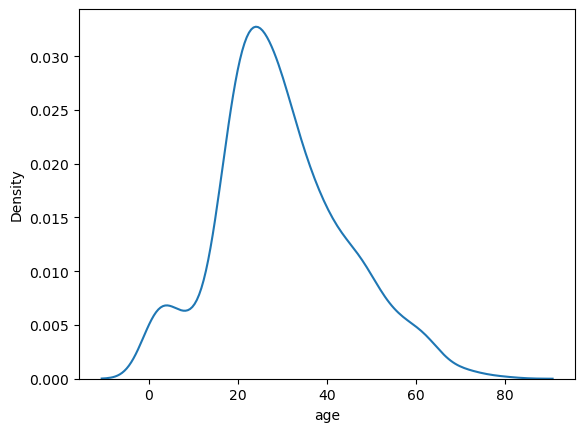

In [13]:
# Show density plot of 'age' variable.
# A density plot is like a histogram, but is used for continuous variables,
# so the y-axis does not measure count, but rather probability.
sns.kdeplot(titanic['age'])

<Axes: ylabel='age'>

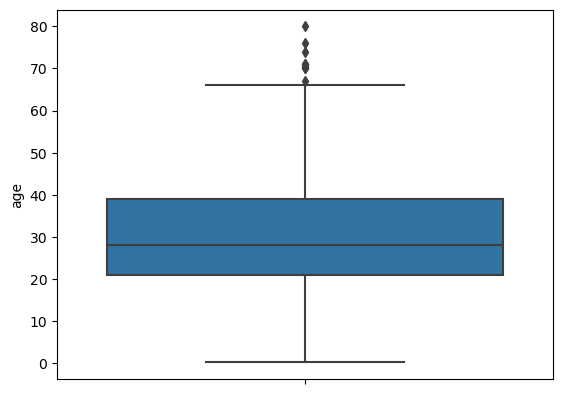

In [14]:
# Show boxplot for variable 'age'
sns.boxplot(y = titanic['age'])

<Axes: xlabel='survived', ylabel='count'>

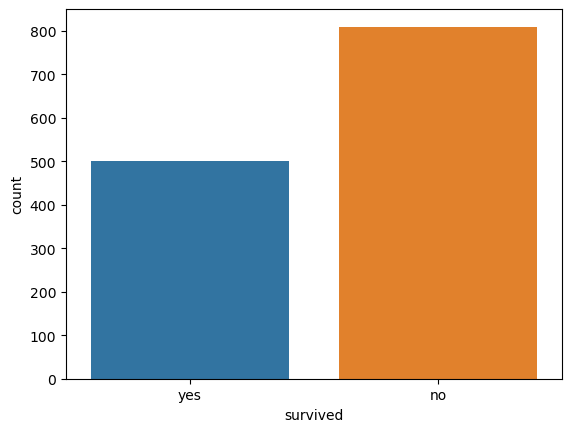

In [16]:
# Show bar chart for variable 'survived' 
sns.countplot(titanic, x='survived')

In [17]:
# Show correlation between numeric varibles.
# There is only one numeric variable in the titanic dataset,
# so of course the correlation between the 'age' variable and itself is 1.
titanic.corr(numeric_only=True)

,age
age,1.0


In [20]:
# Read property dataset from CSV file
propertyDataset = pd.read_csv('property.csv')
propertyDataset

,financial_year,type_of_hdb,no_of_cases,median_annual_value,property_tax_collection
0,2010,1 or 2 Room,8632,4500,190
1,2010,3 Room,213865,6300,16259
2,2010,4 Room,339721,8100,45089
3,2010,5 Room,209210,9000,37936
4,2010,Executive & Others,64613,9300,13046
5,2011,1 or 2 Room,9310,5400,242
6,2011,3 Room,214311,7800,15120
7,2011,4 Room,347111,9600,41575
8,2011,5 Room,212018,10800,35677
9,2011,Executive & Others,64858,11100,11929


In [21]:
# Show correlation between numeric variables
propertyDataset.corr(numeric_only=True)

,financial_year,no_of_cases,median_annual_value,property_tax_collection
financial_year,1.000000,0.070673,0.086333,0.025257
no_of_cases,0.070673,1.000000,0.397860,0.906023
median_annual_value,0.086333,0.397860,1.000000,0.615492
property_tax_collection,0.025257,0.906023,0.615492,1.000000


<Axes: >

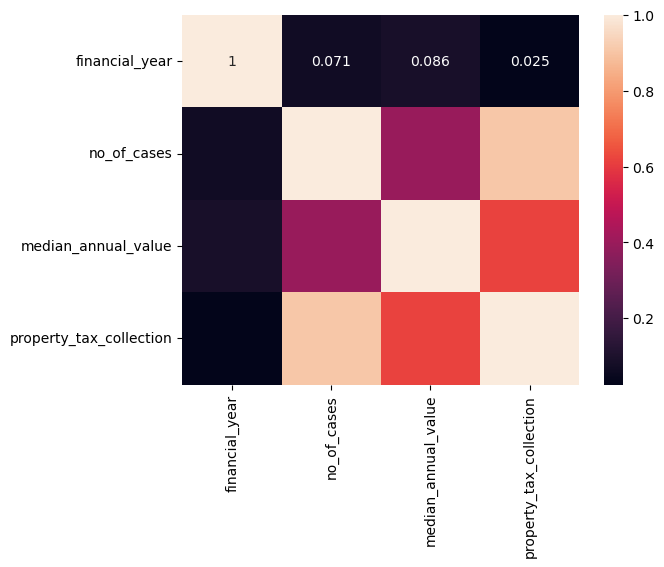

In [23]:
# Show correlation between variables as a heatmap instead
# (light colors means higher correlation,
# dark colors means lower correlation)
sns.heatmap(propertyDataset.corr(numeric_only=True), annot=True)

## Lets try to create new variable to address step 6 from EDA 
We will discretize the variable age into multiple categories identified by age bands 

1) What is descretization

2) ```pd.cut``` function

In [24]:
# Create a new variable 'agebins' which will be categorical.
# We use the 'age' variable to create 16 bins.
titanic['agebins'] = pd.cut(titanic['age'], 16)
titanic

,rownames,survived,sex,age,passengerClass,agebins
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st,"(25.115, 30.104]"
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st,"(0.0869, 5.156]"
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st,"(0.0869, 5.156]"
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st,"(25.115, 30.104]"
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st,"(20.125, 25.115]"
...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",no,female,14.5000,3rd,"(10.146, 15.135]"
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd,NaN
1306,"Zakarian, Mr. Mapriededer",no,male,26.5000,3rd,"(25.115, 30.104]"
1307,"Zakarian, Mr. Ortin",no,male,27.0000,3rd,"(25.115, 30.104]"


In [25]:
# Same as above, but choose exactly where the bin boundaries are, and label each bin
titanic['agebins2'] = pd.cut(titanic['age'], bins = [0,10,35,55,80], labels = ['children','young','adult','elderly'])
titanic

,rownames,survived,sex,age,passengerClass,agebins,agebins2
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st,"(25.115, 30.104]",young
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st,"(0.0869, 5.156]",children
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st,"(0.0869, 5.156]",children
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st,"(25.115, 30.104]",young
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st,"(20.125, 25.115]",young
...,...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",no,female,14.5000,3rd,"(10.146, 15.135]",young
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd,NaN,NaN
1306,"Zakarian, Mr. Mapriededer",no,male,26.5000,3rd,"(25.115, 30.104]",young
1307,"Zakarian, Mr. Ortin",no,male,27.0000,3rd,"(25.115, 30.104]",young


In [26]:
# Show the frequency of each value of the 'agebins2' variable
titanic['agebins2'].value_counts()

agebins2
young       638
adult       263
children     86
elderly      59
Name: count, dtype: int64

In [27]:
# Show minimum 'age' values for each category in 'agebins2' variable
titanic.groupby('agebins2')['age'].min()

C:\Users\jasonchan\AppData\Local\Temp\ipykernel_21564\623229407.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('agebins2')['age'].min()


agebins2
children     0.1667
young       11.0000
adult       36.0000
elderly     55.5000
Name: age, dtype: float64

In [28]:
# Show maximum 'age' values for each category in 'agebins2' variable
titanic.groupby('agebins2')['age'].max()

C:\Users\jasonchan\AppData\Local\Temp\ipykernel_21564\4167118763.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('agebins2')['age'].max()


agebins2
children    10.0
young       35.0
adult       55.0
elderly     80.0
Name: age, dtype: float64

C:\Users\jasonchan\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='agebins2', ylabel='count'>

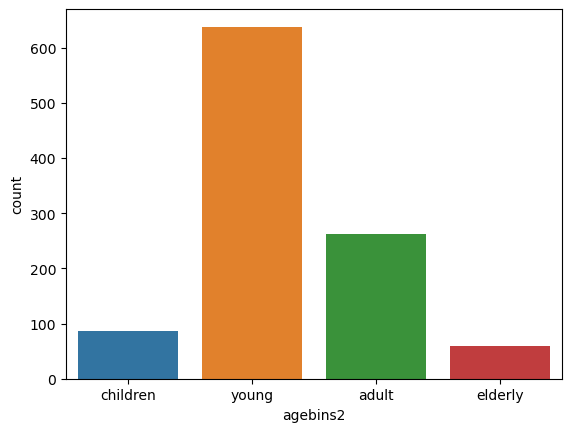

In [29]:
sns.countplot(titanic, x = 'agebins2')